# Chapter 2- Group Exercise 2 - Regression Analysis and Feature Selection
Perform regression analysis on a dataset with over 1000 data points and at least 30 features. Apply preprocessing, build models, evaluate performance, and enhance them using feature selection methods. Demonstrate creativity with additional techniques or insights.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
np.random.seed(42)

Dataset of US wildfires

Source: https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires

Data was filtered to last 2 years and converted to CSV for manageability

Feature descriptions available at the source link

In [3]:
# Load the raw wildfire dataset
df = pd.read_csv('fire_data_last_2_years.csv')
df.head()

/tmp/ipykernel_190837/4146011757.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fire_data_last_2_years.csv')


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1721941,300000001,FS-1524899,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.340833,-116.466667,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00\x1cr\xe1\xdd\xdd\x1...
1,1721942,300000002,FS-1524894,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.505278,-116.425556,5.0,USFS,ID,Idaho,49.0,Idaho,"b'\x00\x01\xad\x10\x00\x00,5cM<\x1b]\xc0p?:\xf..."
2,1721943,300000003,FS-1524891,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.908056,-115.767778,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00\x80\xeciE#\xf1\\\xc...
3,1721944,300000004,FS-1524900,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.840000,-115.966389,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00 q\xc9P\xd9\xfd\\\xc...
4,1721945,300000005,FS-1522737,FED,FS-FIRESTAT,FS,USIDNCF,Nez Perce - Clearwater National Forests,0117,Nezperce National Forest,...,A,45.598333,-115.449167,5.0,USFS,ID,Idaho,49.0,Idaho,b'\x00\x01\xad\x10\x00\x00\x98\x86\x8f%\xbf\xd...


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Define target and features
target = 'FIRE_SIZE'
X = df.drop(columns=[target])
y = df[target]

# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (113795, 38)
Test set: (28449, 38)


The dataset is split 80/20 into training (78,294 rows) and test (19,574 rows) sets before any scaling, encoding, or feature engineering.

This ensures all transformations are fitted on the training set only and applied to the test set, preventing data leakage, where information from the test set influences the model during training.

This simulates how the model would perform on genuinely unseen data.

## Preprocessing
- Handle missing values and outliers.
- Scale features using standardization or normalization.
- Perform feature selection.

## Missing Values

In [6]:
# Check dataset features and identify missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113795 entries, 40479 to 121958
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    113795 non-null  int64  
 1   FOD_ID                      113795 non-null  int64  
 2   FPA_ID                      113795 non-null  object 
 3   SOURCE_SYSTEM_TYPE          113795 non-null  object 
 4   SOURCE_SYSTEM               113795 non-null  object 
 5   NWCG_REPORTING_AGENCY       113795 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      113795 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    113795 non-null  object 
 8   SOURCE_REPORTING_UNIT       113795 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  113795 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        20513 non-null   float64
 11  LOCAL_INCIDENT_ID           99437 non-null   object 
 12  FIRE_CODE                   24450 non-null   object 
 13  FIRE_NAME      

In [7]:
# Missing percentages (divide by total rows)
missing_pct = (X_train.isnull().sum() / len(X_train)) * 100
print(f"\nColumns with Missing Values: {len(missing_pct[missing_pct > 0])}")
missing_pct[missing_pct > 0].sort_values(ascending=False)


Columns with Missing Values: 16


COMPLEX_NAME               99.579946
MTBS_ID                    99.418252
MTBS_FIRE_NAME             99.418252
ICS_209_INCIDENT_NUMBER    98.054396
ICS_209_NAME               98.054396
LOCAL_FIRE_REPORT_ID       81.973725
FIRE_CODE                  78.513994
CONT_TIME                  28.087350
FIRE_NAME                  22.243508
DISCOVERY_TIME             20.763654
CONT_DOY                   19.395404
CONT_DATE                  19.395404
LOCAL_INCIDENT_ID          12.617426
COUNTY                     12.299310
FIPS_CODE                  12.299310
FIPS_NAME                  12.299310
dtype: float64

We will first remove columns that are not useful for analysis like:
- ID columns (OBJECTID, FOD_ID, etc.)
- Columns with >70% missing data
- Redundant columns

In [8]:
# Removing IDs and redundant columns
id_and_redundant_columns = [
    # Identifiers (no analytical value)
    'OBJECTID',
    'FPA_ID',
    'LOCAL_INCIDENT_ID',
    'LOCAL_FIRE_REPORT_ID',

    # Redundant
    'SOURCE_REPORTING_UNIT',      # Redundant with NWCG_REPORTING_UNIT_ID
    'SOURCE_REPORTING_UNIT_NAME',  # Redundant with NWCG_REPORTING_UNIT_NAME
    'STAT_CAUSE_CODE',           # Redundant with STAT_CAUSE_DESCR
    'OWNER_CODE',                # Redundant with OWNER_DESCR

    # Geometric/shape data (not useful for basic tabular analysis)
    'Shape'
]

X_train = X_train.drop(columns=id_and_redundant_columns)
X_test = X_test.drop(columns=id_and_redundant_columns)
print(f"Remaining columns: {X_train.shape[1]}")

Remaining columns: 29


In [9]:
# We will drop all columns where more than 70% of the column value is missing
# They too sparse for reliable imputation
high_missing_columns = [
    'FIRE_CODE',                 # 78% missing
    'ICS_209_INCIDENT_NUMBER',   # 98% missing
    'ICS_209_NAME',              # 98% missing
    'MTBS_ID',                   # 99% missing
    'MTBS_FIRE_NAME',            # 99% missing
    'COMPLEX_NAME'               # 99% missing
]

X_train = X_train.drop(columns=high_missing_columns)
X_test = X_test.drop(columns=high_missing_columns)
print(f"Remaining columns: {X_train.shape[1]}")

Remaining columns: 23


- FOD_ID is retained as a unique identifier as it allows each record to be traced back to the original data source for debugging or analysis.

- It will not be used as a model feature and is kept strictly for record-keeping purposes.

In [10]:
# Recalculate missing percentages after column removal
missing_pct = (X_train.isnull().sum() / len(X_train)) * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

CONT_TIME         28.087350
FIRE_NAME         22.243508
DISCOVERY_TIME    20.763654
CONT_DATE         19.395404
CONT_DOY          19.395404
COUNTY            12.299310
FIPS_CODE         12.299310
FIPS_NAME         12.299310
dtype: float64

Now we investigate the why behind missing values to choose appropriate imputation strategies.

#### Feature 1: CONT_DATE (Containment Date) / CONT_TIME (Containment Time) / CONT_DOY (Containment Day of Year)

In [11]:
# Check if CONT_DATE and CONT_DOY are always missing in the same records
print("\nCONT_DATE missing:", X_train['CONT_DATE'].isna().sum())
print("CONT_DOY missing:", X_train['CONT_DOY'].isna().sum())

# Check if they're missing in the exact same rows
both_missing = X_train['CONT_DATE'].isna() & X_train['CONT_DOY'].isna()
print("Both missing together:", both_missing.sum())

# Check if one is missing without the other
only_date_missing = X_train['CONT_DATE'].isna() & X_train['CONT_DOY'].notna()
only_doy_missing = X_train['CONT_DATE'].notna() & X_train['CONT_DOY'].isna()
print("Only CONT_DATE missing:", only_date_missing.sum())
print("Only CONT_DOY missing:", only_doy_missing.sum())


CONT_DATE missing: 22071
CONT_DOY missing: 22071
Both missing together: 22071
Only CONT_DATE missing: 0
Only CONT_DOY missing: 0


In [12]:
# How many CONT_DATE, CONT_DOY, and CONT_TIME are missing?
print("\nNumber of missing values of:")
print("CONT_DATE:", X_train['CONT_DATE'].isna().sum())
print("CONT_DOY:", X_train['CONT_DOY'].isna().sum())
print("CONT_TIME:", X_train['CONT_TIME'].isna().sum())

# Check if they're missing in the same rows
missing_all = X_train[X_train['CONT_DATE'].isna() &
                      X_train['CONT_DOY'].isna() &
                      X_train['CONT_TIME'].isna()]
print(f"\nIn {len(missing_all)} rows ALL three features are missing")
print(f"Percentage of training data: {len(missing_all)/len(X_train)*100:.2f}%")


Number of missing values of:
CONT_DATE: 22071
CONT_DOY: 22071
CONT_TIME: 31962

In 22071 rows ALL three features are missing
Percentage of training data: 19.40%


When CONT_DATE and CONT_DOY are missing, CONT_TIME is always missing too. However, there are 9,891 cases where we have a containment date and day of year but no containment time.


Distribution in Training Set:
count    81833.000000
mean       947.454462
std        240.310149
min          0.000000
25%        822.000000
50%        961.000000
75%       1095.000000
max       1439.000000
Name: CONT_TIME_MINUTES, dtype: float64

Skewness: -0.9053


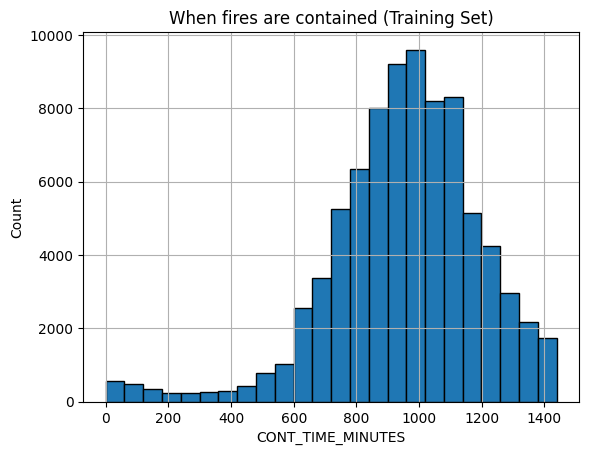

In [13]:
# Convert time to minutes for BOTH train and test
X_train['CONT_TIME_MINUTES'] = (X_train['CONT_TIME'] // 100) * 60 + (X_train['CONT_TIME'] % 100)
X_test['CONT_TIME_MINUTES'] = (X_test['CONT_TIME'] // 100) * 60 + (X_test['CONT_TIME'] % 100)

print("\nDistribution in Training Set:")
print(X_train['CONT_TIME_MINUTES'].describe())

# Check skewness
print(f"\nSkewness: {X_train['CONT_TIME_MINUTES'].skew():.4f}")

# Histogram with 24 bins (24 hours)
import matplotlib.pyplot as plt
X_train['CONT_TIME_MINUTES'].hist(bins=24, edgecolor='black')
plt.xlabel('CONT_TIME_MINUTES')
plt.ylabel('Count')
plt.title('When fires are contained (Training Set)')
plt.show()

Records missing CONT_DATE and CONT_DOY will be removed because these fields share a 1:1 relationship and cannot be reconstructed without temporal modelling (out of scope). For the remaining ~10,000 rows where date information is present but CONT_TIME is missing, values will be imputed using Gaussian noise via a NumPy random number generator. This method is appropriate as the existing CONT_TIME data follows an approximately normal distribution.

In [14]:
# Remove rows where the containment date is missing
original_train_rows = len(X_train)
train_mask = X_train['CONT_DATE'].notna() & X_train['CONT_DOY'].notna()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

original_test_rows = len(X_test)
test_mask = X_test['CONT_DATE'].notna() & X_test['CONT_DOY'].notna()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(f"Dropped {original_train_rows - len(X_train)} rows from training set due to missing date information.")
print(f"Dropped {original_test_rows - len(X_test)} rows from test set due to missing date information.")

# Impute remaining missing minutes using Gaussian noise
train_mu = X_train['CONT_TIME_MINUTES'].mean()
train_sigma = X_train['CONT_TIME_MINUTES'].std()

# Apply imputation to Training Set
train_missing = X_train['CONT_TIME_MINUTES'].isna()
X_train.loc[train_missing, 'CONT_TIME_MINUTES'] = np.clip(
    np.random.normal(train_mu, train_sigma, train_missing.sum()), 0, 1439
)

# Apply imputation to Test Set using Training Set statistics to avoid data leakage
test_missing = X_test['CONT_TIME_MINUTES'].isna()
X_test.loc[test_missing, 'CONT_TIME_MINUTES'] = np.clip(
    np.random.normal(train_mu, train_sigma, test_missing.sum()), 0, 1439
)

# Drop the original CONT_TIME column as it is no longer needed and contains NaNs
X_train = X_train.drop(columns=['CONT_TIME'])
X_test = X_test.drop(columns=['CONT_TIME'])

print(f"Imputed {train_missing.sum()} time values in training set.")
print(f"Imputed {test_missing.sum()} time values in test set.")
print(f"Final training shape: {X_train.shape}")

Dropped 22071 rows from training set due to missing date information.
Dropped 5569 rows from test set due to missing date information.
Imputed 9891 time values in training set.
Imputed 2436 time values in test set.
Final training shape: (91724, 23)


As a next step we will deal the feature FIRE_NAME

#### Feature 2: FIRE_NAME

In [15]:
# Check FIRE_NAME uniqueness
print(f"Total Entries: {len(X_train)}")
print(f"Unique fire names: {X_train['FIRE_NAME'].nunique()}")
print(f"Missing values: {X_train['FIRE_NAME'].isna().sum()} ({X_train['FIRE_NAME'].isna().sum()/len(X_train)*100:.2f}%)")
print(f"Ratio of unique names to total entries: {X_train['FIRE_NAME'].nunique()/len(X_train):.5f}")

print("\nTop 10 fire names:")
print(X_train['FIRE_NAME'].value_counts().head(10))

# Check STAT_CAUSE_DESCR uniqueness for comparison
print(f"Total Entries: {len(X_train)}")
print(f"Unique cause descriptions: {X_train['STAT_CAUSE_DESCR'].nunique()}")
print(f"Missing values: {X_train['STAT_CAUSE_DESCR'].isna().sum()}")
print(f"Ratio of unique causes to total entries: {X_train['STAT_CAUSE_DESCR'].nunique()/len(X_train):.5f}")

print("\nTop 10 fire causes:")
print(X_train['STAT_CAUSE_DESCR'].value_counts().head(10))

Total Entries: 91724
Unique fire names: 56828
Missing values: 19846 (21.64%)
Ratio of unique names to total entries: 0.61955

Top 10 fire names:
FIRE_NAME
PLYMOUTH      88
BROCKTON      69
QUINCY        63
WEYMOUTH      49
BRAINTREE     45
CREEK         42
COTTONWOOD    42
WILLOW        41
ROCK          40
DEER          37
Name: count, dtype: int64
Total Entries: 91724
Unique cause descriptions: 13
Missing values: 0
Ratio of unique causes to total entries: 0.00014

Top 10 fire causes:
STAT_CAUSE_DESCR
Debris Burning       23051
Miscellaneous        19384
Lightning            13288
Arson                 9786
Missing/Undefined     7240
Equipment Use         6025
Campfire              5538
Children              2028
Smoking               1933
Powerline             1528
Name: count, dtype: int64


The FIRE_NAME column will be removed because it contains arbitrary descriptive labels with a ~21% missingness rate and high uniqueness (62%), making it unsuitable for standardised analysis. Since STAT_CAUSE_DESCR provides formal cause categories and location data is already captured via FIPS_NAME and coordinates, the column is redundant for categorical or spatial modelling.

In [16]:
X_train = X_train.drop(columns=['FIRE_NAME'])
X_test = X_test.drop(columns=['FIRE_NAME'])

print(f"\nAfter removal:")
print(f"X_train columns: {X_train.shape[1]}")
print(f"X_test columns: {X_test.shape[1]}")


After removal:
X_train columns: 22
X_test columns: 22


Following this we will analyse DISCOVERY_TIME

#### Feature 3: DISCOVERY_TIME

Has DISCOVERY_TIME: 83638
Missing DISCOVERY_TIME: 8086
Missing percentage: 8.82%

Distribution (Training Set):
count    83638.000000
mean       906.376551
std        229.090979
min          0.000000
25%        784.000000
50%        907.000000
75%       1045.000000
max       1439.000000
Name: DISCOVERY_TIME_MINUTES, dtype: float64
Skewness of DISCOVERY_TIME_MINUTES: -0.6466


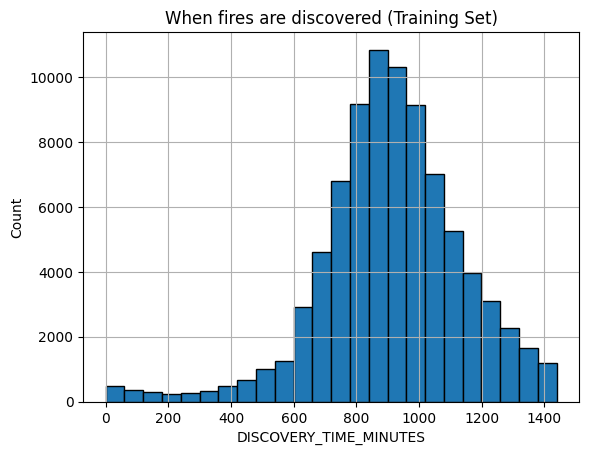

In [17]:
# Convertion of time to minutes
X_train['DISCOVERY_TIME_MINUTES'] = (X_train['DISCOVERY_TIME'] // 100) * 60 + (X_train['DISCOVERY_TIME'] % 100)
X_test['DISCOVERY_TIME_MINUTES'] = (X_test['DISCOVERY_TIME'] // 100) * 60 + (X_test['DISCOVERY_TIME'] % 100)

# Check missing count
print(f"Has DISCOVERY_TIME: {X_train['DISCOVERY_TIME_MINUTES'].notna().sum()}")
print(f"Missing DISCOVERY_TIME: {X_train['DISCOVERY_TIME_MINUTES'].isna().sum()}")
print(f"Missing percentage: {X_train['DISCOVERY_TIME_MINUTES'].isna().sum()/len(X_train)*100:.2f}%")

print("\nDistribution (Training Set):")
print(X_train['DISCOVERY_TIME_MINUTES'].describe())

# Skewness of discovery time
skewness = X_train['DISCOVERY_TIME_MINUTES'].skew()
print(f"Skewness of DISCOVERY_TIME_MINUTES: {skewness:.4f}")

# Histogram with 24 bins (24 hours in military time)
X_train['DISCOVERY_TIME_MINUTES'].hist(bins=24, edgecolor='black')
plt.xlabel('DISCOVERY_TIME_MINUTES')
plt.ylabel('Count')
plt.title('When fires are discovered (Training Set)')
plt.show()

The CONT_TIME variable exhibits an approximately normal distribution centered at 907 minutes (roughly 3:00 PM) with a skewness of roughly -0.64. Given the low rate of missingness (~8%), missing values will be imputed using Gaussian noise with a standard deviation of 229 minutes. This approach is justified because sampling from the existing distribution maintains realistic variance and preserves the statistical integrity of the time-of-day data.

In [18]:
# Calculate Gaussian parameters from the training set for imputation
disc_mu = X_train['DISCOVERY_TIME_MINUTES'].mean()
disc_sigma = X_train['DISCOVERY_TIME_MINUTES'].std()

# Impute missing values in the Training Set
missing_disc_train = X_train['DISCOVERY_TIME_MINUTES'].isna()
X_train.loc[missing_disc_train, 'DISCOVERY_TIME_MINUTES'] = np.clip(
    np.random.normal(disc_mu, disc_sigma, missing_disc_train.sum()), 0, 1439
)

# Impute missing values in the Test Set using Training statistics
missing_disc_test = X_test['DISCOVERY_TIME_MINUTES'].isna()
X_test.loc[missing_disc_test, 'DISCOVERY_TIME_MINUTES'] = np.clip(
    np.random.normal(disc_mu, disc_sigma, missing_disc_test.sum()), 0, 1439
)

# Drop discovery time
X_train = X_train.drop(columns=['DISCOVERY_TIME'])
X_test = X_test.drop(columns=['DISCOVERY_TIME'])

print(f"Filled {missing_disc_train.sum()} missing values in Training set")
print(f"Filled {missing_disc_test.sum()} missing values in Test set")

Filled 8086 missing values in Training set
Filled 1972 missing values in Test set


At last we check FIPS_CODE/FIPS_NAME

#### Feature 4: FIPS_CODE / FIPS_NAME

In [19]:
# Missing count
print(f"Missing FIPS_CODE: {X_train['FIPS_CODE'].isna().sum()} ({X_train['FIPS_CODE'].isna().sum()/len(X_train)*100:.2f}%)")
print(f"Missing FIPS_NAME: {X_train['FIPS_NAME'].isna().sum()} ({X_train['FIPS_NAME'].isna().sum()/len(X_train)*100:.2f}%)")

# Are both missing on the same row
both_missing = X_train['FIPS_CODE'].isna() & X_train['FIPS_NAME'].isna()
print(f"Both missing together: {both_missing.sum()} ({both_missing.sum()/len(X_train)*100:.2f}%)")

# Check if one is missing without the other
only_code_missing = X_train['FIPS_CODE'].isna() & X_train['FIPS_NAME'].notna()
only_name_missing = X_train['FIPS_CODE'].notna() & X_train['FIPS_NAME'].isna()
print(f"Only FIPS_CODE missing: {only_code_missing.sum()}")
print(f"Only FIPS_NAME missing: {only_name_missing.sum()}")

Missing FIPS_CODE: 13410 (14.62%)
Missing FIPS_NAME: 13410 (14.62%)
Both missing together: 13410 (14.62%)
Only FIPS_CODE missing: 0
Only FIPS_NAME missing: 0


In [20]:
# Drop rows with missing FIPS
original_train_rows = len(X_train)
train_mask = X_train['FIPS_CODE'].notna() & X_train['FIPS_NAME'].notna()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

print(f"\nTraining set:")
print(f"Original rows: {original_train_rows}")
print(f"Dropped rows: {original_train_rows - len(X_train)}")
print(f"Remaining rows: {len(X_train)} ({len(X_train)/original_train_rows*100:.2f}%)")

original_test_rows = len(X_test)
test_mask = X_test['FIPS_CODE'].notna() & X_test['FIPS_NAME'].notna()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(f"\nTest set:")
print(f"Original rows: {original_test_rows}")
print(f"Dropped rows: {original_test_rows - len(X_test)}")
print(f"Remaining rows: {len(X_test)} ({len(X_test)/original_test_rows*100:.2f}%)")


Training set:
Original rows: 91724
Dropped rows: 13410
Remaining rows: 78314 (85.38%)

Test set:
Original rows: 22880
Dropped rows: 3326
Remaining rows: 19554 (85.46%)


Rows missing FIPS codes will be removed because county-level location is essential for analysis, and the 15% missingness rate is too high for simple imputation. While broad location context remains available through coordinates, precise imputation would require reverse geocoding (out of scope). Dropping these records retains 97,868 observations (85% of the data), which is sufficient for a robust analysis.

In [21]:
# Check for any remaining missing values
missing_test = X_test.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_test[missing_test > 0])
print(f"\nFinal shape: {df.shape}")

Missing values per column:
Series([], dtype: int64)

Final shape: (142244, 39)


## Handling Outliers



In [22]:
from scipy.stats import zscore

### Fire Size Outliers

In [23]:
# Examine distribution
print("FIRE_SIZE statistics:")
print(y_train.describe())

FIRE_SIZE statistics:
count     78314.000000
mean         79.760221
std        2701.836819
min           0.000100
25%           0.100000
50%           0.500000
75%           3.000000
max      312918.300000
Name: FIRE_SIZE, dtype: float64


In [24]:
#  Calculate Z-score for FIRE_SIZE
fire_size_z = pd.Series(
    zscore(y_train),
    index=y_train.index
)

# Detect outliers (|z-score| > 3)
outliers_z = fire_size_z[fire_size_z.abs() > 3]

print(f"Z-score outliers: {len(outliers_z)}")



Z-score outliers: 115


In [25]:
# IQR outlier detection

Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = y_train[(y_train < lower) | (y_train > upper)]

print("\nIQR Method:")
print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}")
print(f"Bounds: [{lower:.0f}, {upper:.0f}]")
print(f"Outliers detected: {len(outliers_iqr)} ({round(len(outliers_iqr)/len(y_train)*100, 1)}%)")



IQR Method:
Q1=0.1, Q3=3.0, IQR=2.9
Bounds: [-4, 7]
Outliers detected: 11628 (14.8%)


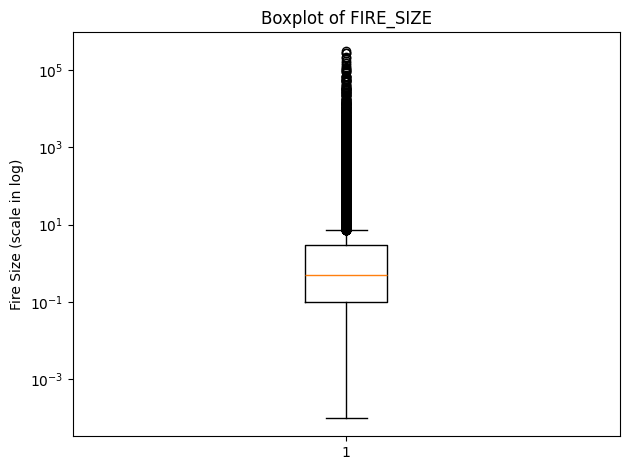

In [26]:
# Visualize outliers with boxplot
plt.boxplot(y_train, vert=True, showfliers=True)
plt.yscale('log')
plt.ylabel('Fire Size (scale in log)')
plt.title('Boxplot of FIRE_SIZE')
plt.tight_layout()
plt.show()

We will keep all outliers without removal or transformation as Fire size follows a non Gaussian distribution where extreme values are inherent to the phenomenon, not errors.

In [27]:
# Drop the temporary pandas series and variables
del fire_size_z
del outliers_z
del outliers_iqr

### Geographic Outliers

Z-score method (threshold: |z| > 3):
  Latitude outliers: 150 (0.19%)
  Longitude outliers: 74 (0.09%)
  Total geographic outliers: 150 (0.19%)

Top 10 States flagged as outliers:
STATE
AK    97
PR    51
HI     2
Name: count, dtype: int64

IQR method:
  Geographic outliers: 150 (0.19%)


/tmp/ipykernel_190837/1340489546.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([X_train[lat_col], X_train[lon_col]], labels=['Latitude', 'Longitude'])


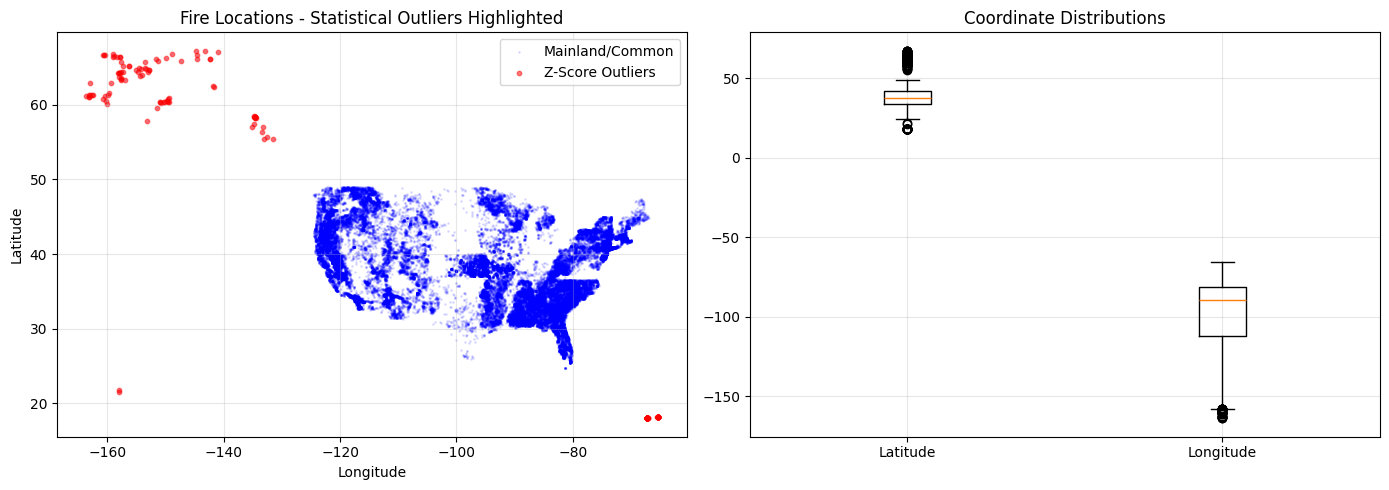

In [28]:
# Use the actual column names from your X_train
lat_col = 'LATITUDE'
lon_col = 'LONGITUDE'

# Calculate Z-scores
lat_z = zscore(X_train[lat_col])
lon_z = zscore(X_train[lon_col])

# Detect outliers (|z-score| > 3)
lat_outliers = X_train[np.abs(lat_z) > 3]
lon_outliers = X_train[np.abs(lon_z) > 3]
geo_outliers = X_train[(np.abs(lat_z) > 3) | (np.abs(lon_z) > 3)]

print(f"Z-score method (threshold: |z| > 3):")
print(f"  Latitude outliers: {len(lat_outliers)} ({len(lat_outliers)/len(X_train)*100:.2f}%)")
print(f"  Longitude outliers: {len(lon_outliers)} ({len(lon_outliers)/len(X_train)*100:.2f}%)")
print(f"  Total geographic outliers: {len(geo_outliers)} ({len(geo_outliers)/len(X_train)*100:.2f}%)")

# Show which states these are
if len(geo_outliers) > 0:
    print(f"\nTop 10 States flagged as outliers:")
    print(geo_outliers['STATE'].value_counts().head(10))

# 3. IQR method for comparison
Q1_lat, Q3_lat = X_train[lat_col].quantile([0.25, 0.75])
IQR_lat = Q3_lat - Q1_lat

Q1_lon, Q3_lon = X_train[lon_col].quantile([0.25, 0.75])
IQR_lon = Q3_lon - Q1_lon

iqr_outliers = X_train[
    (X_train[lat_col] < Q1_lat - 1.5*IQR_lat) | (X_train[lat_col] > Q3_lat + 1.5*IQR_lat) |
    (X_train[lon_col] < Q1_lon - 1.5*IQR_lon) | (X_train[lon_col] > Q3_lon + 1.5*IQR_lon)
]

print(f"\nIQR method:")
print(f"  Geographic outliers: {len(iqr_outliers)} ({len(iqr_outliers)/len(X_train)*100:.2f}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Map view
ax1.scatter(X_train[lon_col], X_train[lat_col], alpha=0.1, s=1, c='blue', label='Mainland/Common')
if len(geo_outliers) > 0:
    ax1.scatter(geo_outliers[lon_col], geo_outliers[lat_col],
                alpha=0.5, s=10, c='red', label='Z-Score Outliers')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Fire Locations - Statistical Outliers Highlighted')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Boxplots
ax2.boxplot([X_train[lat_col], X_train[lon_col]], labels=['Latitude', 'Longitude'])
ax2.set_title('Coordinate Distributions')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
del lat_z
del lon_z
del lat_outliers
del lon_outliers
del geo_outliers

While Alabama, Puerto Rico, and Hawaii are distant from the geographic mean, they provide essential wildfire data for the Southeast and island territories. Unlike extreme fire-size outliers, these spatial outliers reflect the actual geographic breadth of the dataset. Retaining them ensures the model remains representative and capable of predicting fires across diverse US regions.

### CONT_TIME_MINUTES / DISCOVERY_TIME_MINUTES

In [30]:
# Define the columns we want to check
cols_to_check = ['CONT_TIME_MINUTES', 'DISCOVERY_TIME_MINUTES']

outlier_counts = {}

for col in cols_to_check:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(X_train[col]))

    # Count where absolute Z-score is greater than 3
    count = (z_scores > 3).sum()
    outlier_counts[col] = count

print("Outlier Detection Results (|z| > 3):")
for col, count in outlier_counts.items():
    percentage = (count / len(X_train)) * 100
    print(f"{col:22} | Count: {count:<5} | ({percentage:.2f}%)")

Outlier Detection Results (|z| > 3):
CONT_TIME_MINUTES      | Count: 1248  | (1.59%)
DISCOVERY_TIME_MINUTES | Count: 1020  | (1.30%)


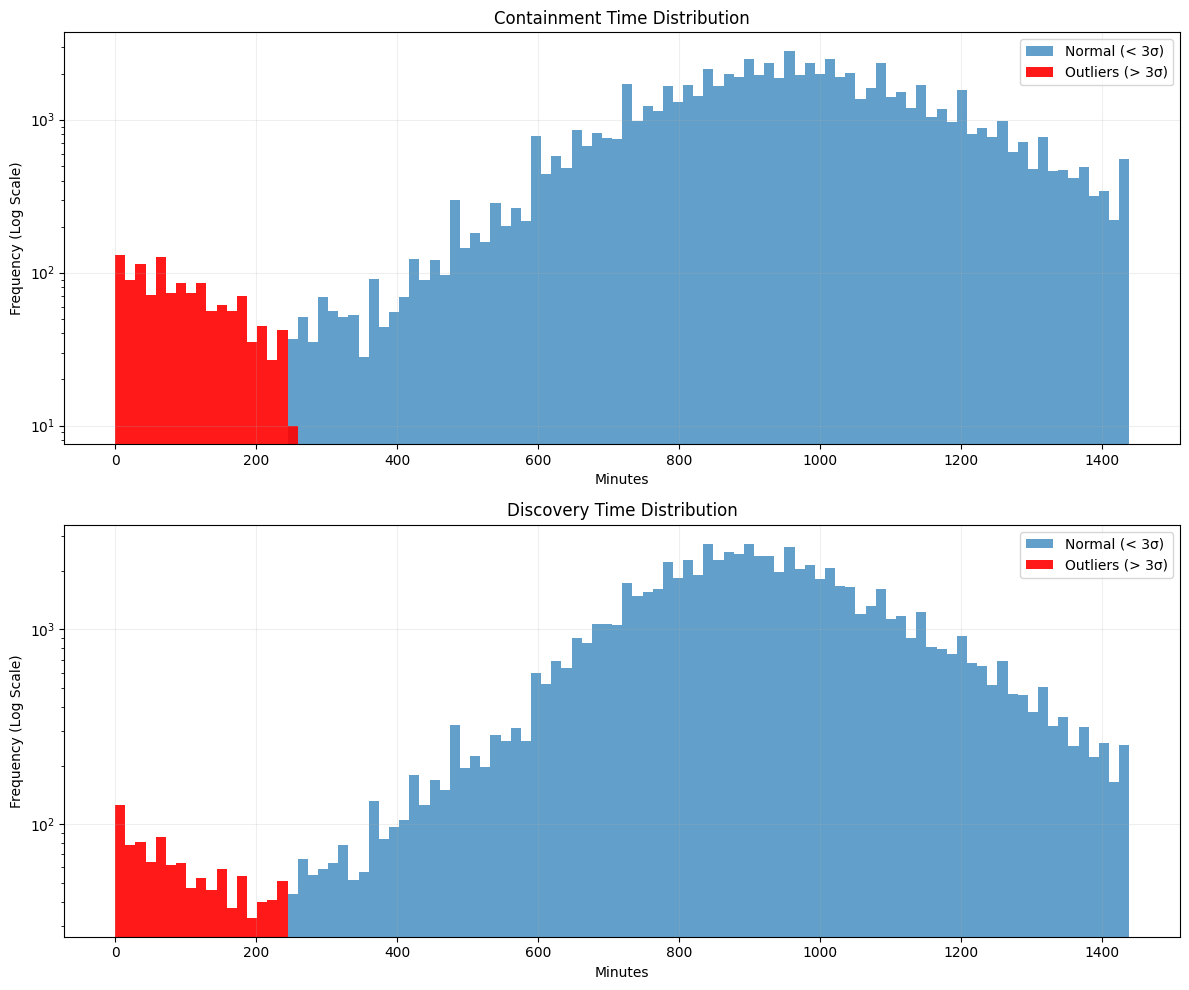

In [31]:
# Calculate Z-scores
cont_z = np.abs(zscore(X_train['CONT_TIME_MINUTES']))
disc_z = np.abs(zscore(X_train['DISCOVERY_TIME_MINUTES']))

# Split the data
cont_normal = X_train.loc[cont_z <= 3, 'CONT_TIME_MINUTES']
cont_outliers = X_train.loc[cont_z > 3, 'CONT_TIME_MINUTES']

disc_normal = X_train.loc[disc_z <= 3, 'DISCOVERY_TIME_MINUTES']
disc_outliers = X_train.loc[disc_z > 3, 'DISCOVERY_TIME_MINUTES']

# Define consistent bin edges
cont_bins = np.linspace(X_train['CONT_TIME_MINUTES'].min(),
                        X_train['CONT_TIME_MINUTES'].max(),
                        101)  # 101 edges = 100 bins

disc_bins = np.linspace(X_train['DISCOVERY_TIME_MINUTES'].min(),
                        X_train['DISCOVERY_TIME_MINUTES'].max(),
                        101)

# Create stacked plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Containment Time histogram
axes[0].hist(cont_normal, bins=cont_bins, alpha=0.7, label='Normal (< 3σ)')
axes[0].hist(cont_outliers, bins=cont_bins, alpha=0.9, color='red', label='Outliers (> 3σ)')
axes[0].set_title('Containment Time Distribution')
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Frequency (Log Scale)')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid(True, alpha=0.2)

# Discovery Time histogram
axes[1].hist(disc_normal, bins=disc_bins, alpha=0.7, label='Normal (< 3σ)')
axes[1].hist(disc_outliers, bins=disc_bins, alpha=0.9, color='red', label='Outliers (> 3σ)')
axes[1].set_title('Discovery Time Distribution')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Frequency (Log Scale)')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

These should not be classified as outliers. Although fires start less often at night than during the day, these occurrences are expected and valid.

In [32]:
del cont_normal
del cont_outliers
del disc_normal
del disc_outliers

## Feature Scaling

## Normalisation and Standardisation

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
# Log transform FIRE_SIZE (add 1 to handle any zero values)
X_train['FIRE_SIZE_log'] = np.log1p(y_train)
X_test['FIRE_SIZE_log'] = np.log1p(y_test)

In [35]:
# Select numerical features
features_to_scale = ['FIRE_SIZE_log', 'DISCOVERY_TIME_MINUTES', 'CONT_TIME_MINUTES',
                     'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY', 'CONT_DOY', 'FIRE_YEAR']

In [36]:
# Scale features (fit on train only, transform both)

scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

std_cols = [f + '_std' for f in features_to_scale]
norm_cols = [f + '_norm' for f in features_to_scale]

# Fit on training set only
X_train[std_cols] = scaler_std.fit_transform(X_train[features_to_scale])
X_train[norm_cols] = scaler_mm.fit_transform(X_train[features_to_scale])

# Transform test set using training set statistics
X_test[std_cols] = scaler_std.transform(X_test[features_to_scale])
X_test[norm_cols] = scaler_mm.transform(X_test[features_to_scale])

print("Training set scaled:")
print(X_train[std_cols].head())
print("\nTest set scaled:")
print(X_test[std_cols].head())

Training set scaled:
        FIRE_SIZE_log_std  DISCOVERY_TIME_MINUTES_std  CONT_TIME_MINUTES_std  \
139495          -0.611420                   -0.913433              -0.946146   
87148           -0.745392                    0.613055               0.564687   
8468            -0.611420                   -0.125276               0.825766   
8648            -0.679048                    0.522462               0.825766   
95104           -0.579692                   -2.523006               0.512556   

        LATITUDE_std  LONGITUDE_std  DISCOVERY_DOY_std  CONT_DOY_std  \
139495     -0.083826      -1.582747           0.722553      0.683491   
87148      -0.023204      -0.151016           1.260249      1.214757   
8468        0.381206      -0.858767           0.173655      0.141157   
8648        0.353089      -0.752475           0.800967      0.760967   
95104       0.841372       1.404014          -0.240819     -0.268360   

        FIRE_YEAR_std  
139495       0.946351  
87148        0.94

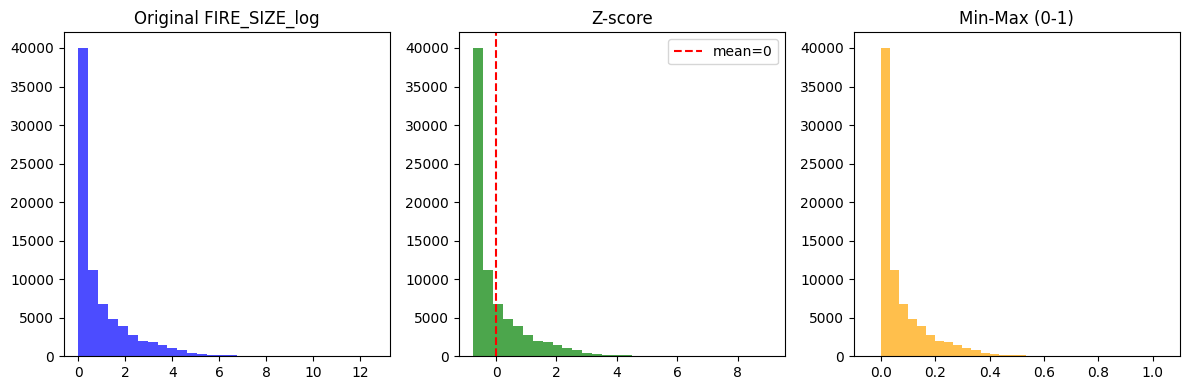

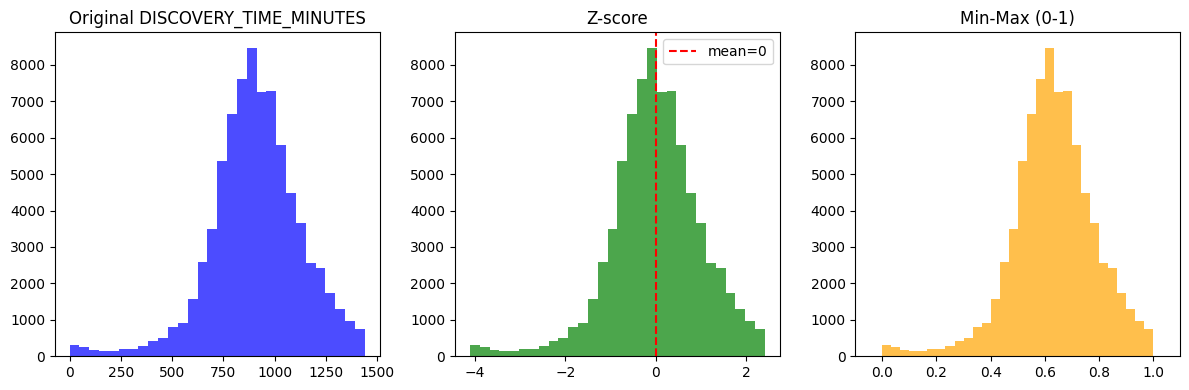

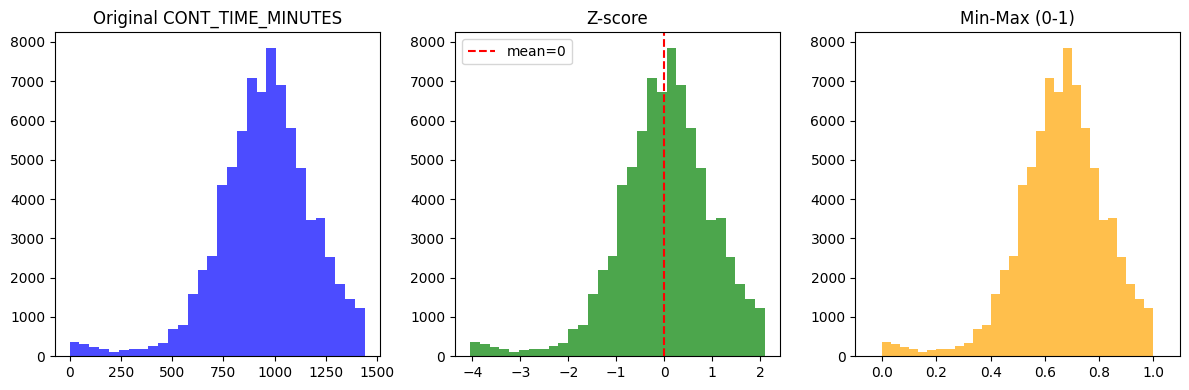

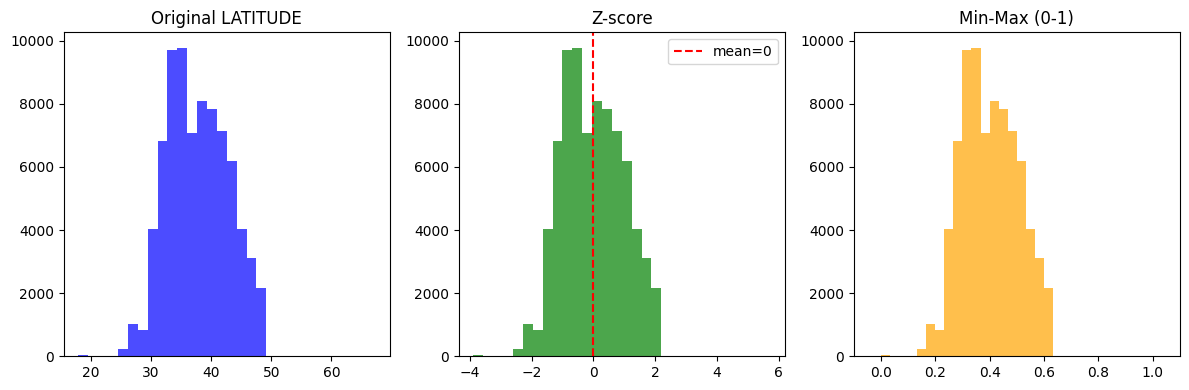

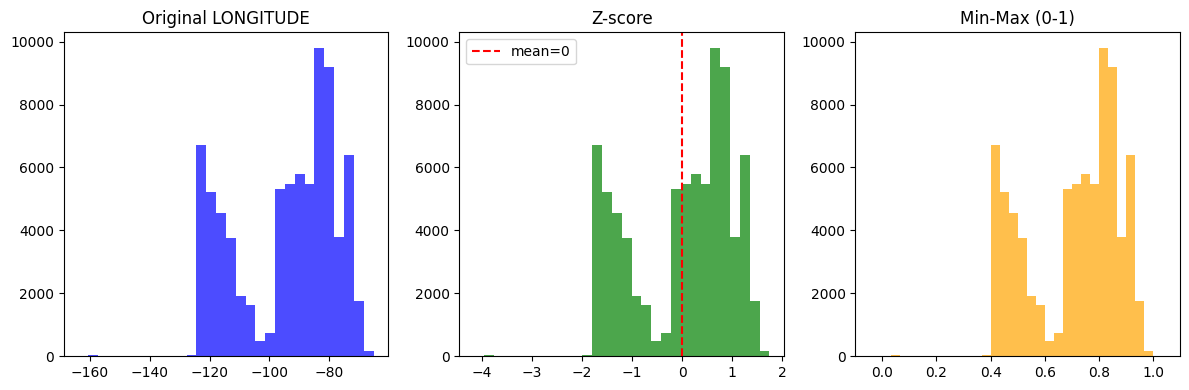

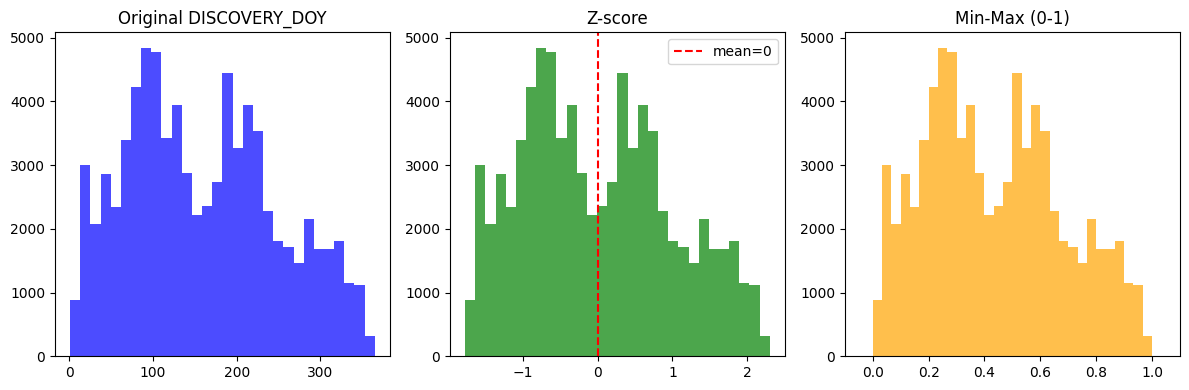

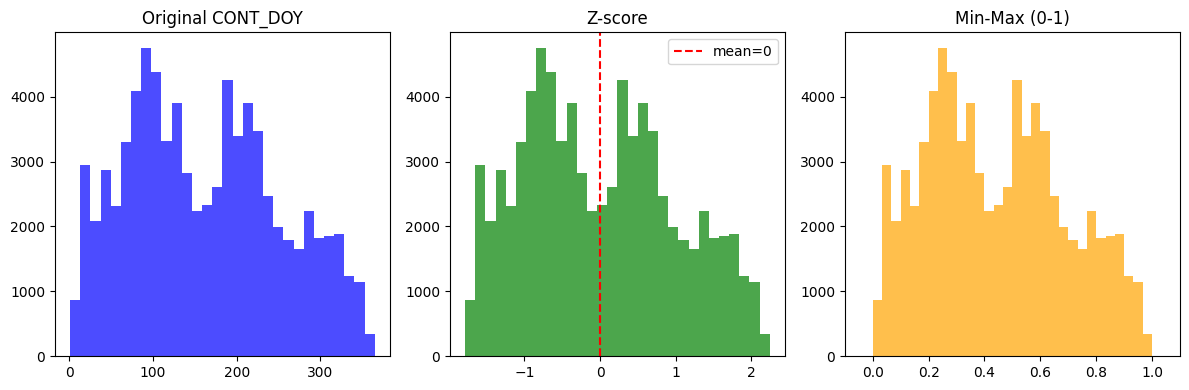

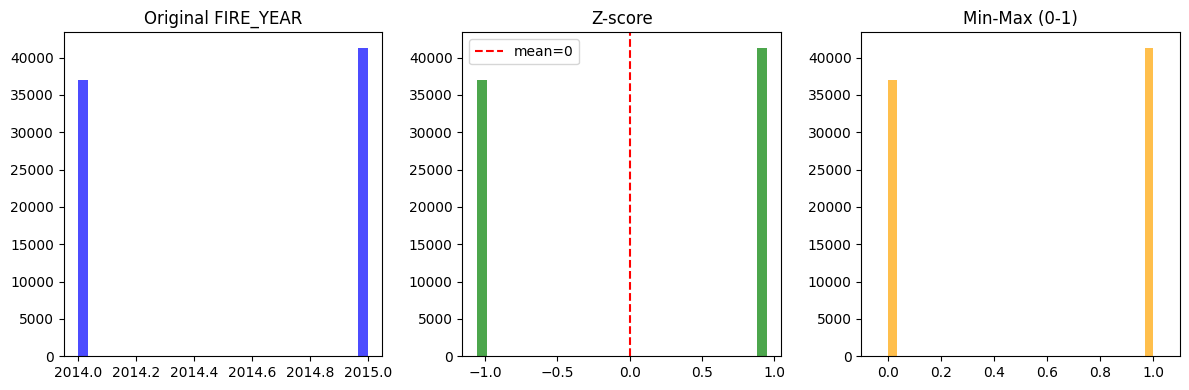

In [37]:
# Histogram for each feature
for feature in features_to_scale:
    plt.figure(figsize=(12, 4))

    bins = 30

    # Original
    plt.subplot(1, 3, 1)
    plt.hist(X_train[feature], bins=bins, color='blue', alpha=0.7)
    plt.title(f'Original {feature}')

    # Z-score
    plt.subplot(1, 3, 2)
    plt.hist(X_train[feature + '_std'], bins=30, color='green', alpha=0.7)
    plt.title('Z-score')
    plt.axvline(x=0, color='r', linestyle='--', label='mean=0')
    plt.legend()

    # Min-Max
    plt.subplot(1, 3, 3)
    plt.hist(X_train[feature + '_norm'], bins=30, color='orange', alpha=0.7)
    plt.title('Min-Max (0-1)')
    plt.xlim(-0.1, 1.1)

    plt.tight_layout()
    plt.show()

In [38]:
# Show skewness of the features we're scaling
print("Skewness of features:")
for feature in features_to_scale:
    print(f"{feature}: {X_train[feature].skew()}")

Skewness of features:
FIRE_SIZE_log: 2.3661188385415954
DISCOVERY_TIME_MINUTES: -0.5446538373134301
CONT_TIME_MINUTES: -0.7507831417762424
LATITUDE: 0.2282379075494365
LONGITUDE: -0.5192897959583048
DISCOVERY_DOY: 0.2930255143038056
CONT_DOY: 0.2514206500742729
FIRE_YEAR: -0.1103415231373879


#### FIRE_SIZE
The original FIRE_SIZE distribution is extremely right-skewed with most values clustered near 0 and a long tail extending to large fires. The x-axis uses log scale (10⁻³ to 10⁵) to even visualize the spread.

Z-score is NOT ideal for FIRE_SIZE due to its extreme skew (74.20). The massive outliers distort both the mean and standard deviation, making the standardized values unhelpful.

Min-Max is also problematic for FIRE_SIZE. The orange plot shows nearly all data compressed at 0 because the maximum fire size is so large compared to typical fires.

---

#### FIRE_SIZE_log (after log transform)

A log transform (log1p) was applied to FIRE_SIZE to reduce the extreme right skew. The transformed distribution is still right-skewed (skew: 2.37) but far more manageable, with values now spread across a visible range (0 to ~13) rather than spanning five orders of magnitude.

Z-score on the log-transformed values is the chosen approach. While the distribution is not perfectly normal, the log transform has reduced the skew from 74.20 to 2.37, which is sufficient for standardisation to produce meaningful centred values. This is the standard method for handling heavily skewed positive-valued features. Keep FIRE_SIZE_log_std.

Min-Max on the log-transformed values shows improved spread compared to the original, with data no longer entirely compressed at 0. However, the remaining right skew still causes most values to cluster in the lower range. Z-score is preferred. Drop FIRE_SIZE_log_norm.

---

#### DISCOVERY_TIME_MINUTES
The original DISCOVERY_TIME_MINUTES distribution is slightly left-skewed (skew: -0.53) with values ranging from 0 to approximately 1500 minutes, peaking around 800-1000 minutes.

Z-score works well for DISCOVERY_TIME_MINUTES due to its mild skew (-0.53) and approximately normal appearance. It preserves the distribution shape while standardizing the scale, making it suitable for combining with other features of different units. The standardized values reveal outliers (those beyond ±3) which represent unusually early or late fire discovery times.

Min-Max scaling is appropriate for DISCOVERY_TIME_MINUTES when bounded [0,1] values are needed. The scaled values are interpretable as relative discovery time (0 = earliest, 1 = latest). This works because there are no extreme outliers distorting the scale.

---

#### CONT_TIME_MINUTES
The original CONT_TIME_MINUTES distribution is slightly left-skewed (skew: -0.72) with values ranging from 0 to approximately 2000 minutes, peaking around 1000 minutes.

Z-score works well for CONT_TIME_MINUTES due to its mild skew (-0.72) and approximately normal appearance. It preserves the distribution shape while standardizing the scale, making it suitable for combining with other features. The standardized values reveal outliers (those beyond ±3) which represent unusually fast or slow containment times.

Min-Max scaling is appropriate for CONT_TIME_MINUTES when bounded [0,1] values are needed. The scaled values are interpretable as relative containment speed (0 = fastest containment, 1 = slowest). This works because there are no extreme outliers distorting the scale.

#### LATITUDE

The original LATITUDE distribution is roughly bell-shaped but slightly irregular, with the majority of values clustered between 30 and 50 degrees and a peak around 35-40.

Z-score works well for LATITUDE as it effectively centers the continental mass at 0 without being overly sensitive to the geographic outliers defining the boundaries.

Min-Max scaling is less effective here for visualizing the main distribution, as the outliers (likely Alaska or Hawaii) compress the continental US data into a small middle segment (0.2–0.6) rather than utilizing the full [0,1] range.

---

#### LONGITUDE

The original LONGITUDE distribution is distinctly bimodal (two separate peaks), representing the two major clusters of fire occurrences (likely Western vs. Eastern US) around -120 and -90.

Z-score is excellent for LONGITUDE because it respects the bimodal nature of the data while standardizing the scale, ensuring neither geographic cluster dominates the other in distance calculations.

Min-Max scaling again highlights the presence of extreme outliers (likely far-west coordinates like Hawaii or Alaska) which set the "0" point, causing the primary dataset to bunch up in the upper half of the scale.

---

#### DISCOVERY_DOY

The original DISCOVERY_DOY distribution is multimodal and broad, with distinct peaks around day 100 (Spring) and day 200 (Summer), and lower frequencies at the start/end of the year.

Z-score works well for DISCOVERY_DOY by centering the "average" fire date at 0, making it easy to identify fires that occurred unusually early or late in the season (tails of the distribution).

Min-Max scaling is highly effective for DISCOVERY_DOY as the data is naturally bounded (days 1-365) without extreme outliers, allowing the distribution to fill the [0,1] space meaningfully.

---

#### CONT_DOY

The original CONT_DOY distribution closely mirrors Discovery DOY, featuring a multimodal shape with peaks around day 100 and day 200.

Z-score is suitable for CONT_DOY, as it maintains the seasonal structure while standardizing the values for comparison with other features.

Min-Max scaling is also appropriate here, providing an intuitive "progress bar" of the fire season where 0 is the beginning of the year and 1 is the end.

---
##### FIRE_YEAR

The original FIRE_YEAR distribution shows two tall, narrow bars at 2014 and 2015, reflecting the discrete nature of the variable — it only takes integer year values across a very limited range.

Z-score is not particularly meaningful for FIRE_YEAR. With only two distinct values, standardisation simply maps them to approximately -1 and +1. The result conveys no useful distributional information beyond indicating which of the two years a record belongs to.

Min-Max scaling behaves similarly, collapsing the two years to 0 and 1. While technically valid, this is equivalent to binary encoding and offers no advantage over treating FIRE_YEAR as a categorical variable.

FIRE_YEAR will excluded from scaling because the dataset is filtered to only two years (2014–2015), leaving the variable with just two discrete values. In a dataset spanning many years, FIRE_YEAR could be meaningfully scaled and compared using both methods.

In [39]:
# Drop columns that are no longer needed
# --- Drop unwanted columns from both sets ---
cols_to_drop = [
    # Original columns
    'FIRE_SIZE_log',
    'DISCOVERY_TIME_MINUTES', 'CONT_TIME_MINUTES',
    'LATITUDE', 'LONGITUDE',
    'DISCOVERY_DATE', 'CONT_DATE', # Already extracted DOY features
    'DISCOVERY_DOY', 'CONT_DOY',
    'FIRE_YEAR',
    'FIPS_CODE',                 # Redundant with FIPS_NAME
    'FIRE_SIZE_CLASS',           # Retrieved from FIRE_SIZE, keeping it would be target leakage

    # Unwanted scaled versions
    'FIRE_SIZE_log_norm',
    'DISCOVERY_TIME_MINUTES_norm',
    'CONT_TIME_MINUTES_norm',
    'LATITUDE_norm',
    'LONGITUDE_norm',
    'DISCOVERY_DOY_std',
    'CONT_DOY_std',
    'FIRE_YEAR_std', 'FIRE_YEAR_norm',
]

X_train.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

print(f"Training columns ({len(X_train.columns)}):")
print(X_train.columns.tolist())

Training columns (18):
['FOD_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_NAME', 'FIRE_SIZE_log_std', 'DISCOVERY_TIME_MINUTES_std', 'CONT_TIME_MINUTES_std', 'LATITUDE_std', 'LONGITUDE_std', 'DISCOVERY_DOY_norm', 'CONT_DOY_norm']


### Categorical Variables

In [40]:
# Check unique values for all categorical columns (using training set)
cat_cols = ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
            'NWCG_REPORTING_UNIT_NAME',
            'STAT_CAUSE_DESCR', 'OWNER_DESCR',
            'STATE', 'COUNTY', 'FIPS_NAME']

for col in cat_cols:
    counts = X_train[col].value_counts().sort_index()
    print(f"\n\n{col} — {X_train[col].nunique()} unique values")
    print(counts.to_string())



SOURCE_SYSTEM_TYPE — 2 unique values
SOURCE_SYSTEM_TYPE
FED       14983
NONFED    63331


SOURCE_SYSTEM — 4 unique values
SOURCE_SYSTEM
DOI-WFMI        4662
FS-FIRESTAT     9618
FWS-FMIS         703
ST-NASF        63331


NWCG_REPORTING_AGENCY — 5 unique values
NWCG_REPORTING_AGENCY
BLM        4661
BOR           3
FS         9621
FWS         704
ST/C&L    63325


NWCG_REPORTING_UNIT_NAME — 441 unique values
NWCG_REPORTING_UNIT_NAME
Ace Basin National Wildlife Refuge                                   3
Agassiz National Wildlife Refuge                                     2
Alabama Forestry Commission                                       3417
Alamosa National Wildlife Refuge                                     1
Alaska Maritime National Wildlife Refuge                             1
Allegheny National Forest                                            9
Alligator River National Wildlife Refuge                             7
Amador-El Dorado Unit                                            

In [41]:
# Frequency encoding for high-cardinality features
county_freq = X_train['COUNTY'].value_counts()
unit_freq = X_train['NWCG_REPORTING_UNIT_ID'].value_counts()

X_train['COUNTY_freq'] = X_train['COUNTY'].map(county_freq)
X_test['COUNTY_freq'] = X_test['COUNTY'].map(county_freq).fillna(0)

X_train['NWCG_REPORTING_UNIT_freq'] = X_train['NWCG_REPORTING_UNIT_ID'].map(unit_freq)
X_test['NWCG_REPORTING_UNIT_freq'] = X_test['NWCG_REPORTING_UNIT_ID'].map(unit_freq).fillna(0)

# Scale the frequency columns (fit on train only)
freq_scaler = StandardScaler()
X_train[['COUNTY_freq', 'NWCG_REPORTING_UNIT_freq']] = freq_scaler.fit_transform(
    X_train[['COUNTY_freq', 'NWCG_REPORTING_UNIT_freq']])
X_test[['COUNTY_freq', 'NWCG_REPORTING_UNIT_freq']] = freq_scaler.transform(
    X_test[['COUNTY_freq', 'NWCG_REPORTING_UNIT_freq']])

# Drop the original high-cardinality columns
X_train.drop(columns=['COUNTY', 'FIPS_NAME', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME'], inplace=True)
X_test.drop(columns=['COUNTY', 'FIPS_NAME', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME'], inplace=True)

print("Frequency encoded columns (training set):")
print(X_train[['COUNTY_freq', 'NWCG_REPORTING_UNIT_freq']].describe())

Frequency encoded columns (training set):
        COUNTY_freq  NWCG_REPORTING_UNIT_freq
count  7.831400e+04              7.831400e+04
mean   3.955827e-17              1.070614e-16
std    1.000006e+00              1.000006e+00
min   -8.883316e-01             -1.114285e+00
25%   -6.177663e-01             -9.574286e-01
50%   -3.287534e-01             -4.667860e-01
75%    1.447358e-01              1.047157e+00
max    4.781241e+00              1.837974e+00


COUNTY (1942 unique), FIPS_NAME (1394), NWCG_REPORTING_UNIT_ID (456), and NWCG_REPORTING_UNIT_NAME (455) have too many categories for one-hot encoding. COUNTY and FIPS_NAME overlap (both represent county-level geography), as do the NWCG ID/NAME pair. Keeping COUNTY and NWCG_REPORTING_UNIT_ID avoids redundancy.
Frequency encoding replaces each category with its occurrence count from the training set, creating a single numeric column instead of thousands of sparse dummies. Unseen test categories receive 0 (prevents leakage). Frequencies are then standardised. Note that counts reflect this 2014–2015 subset — a rare county may simply have had fewer fires in this period rather than being low-risk generally.

In [42]:
# One-Hot Encoding for low/medium cardinality features
cols_to_encode = ['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
                  'STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STATE']

X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)

# Align columns - test set may be missing categories that only appear in train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print(f"Training shape after encoding: {X_train.shape}")
print(f"Test shape after encoding: {X_test.shape}")

Training shape after encoding: (78314, 93)
Test shape after encoding: (19554, 93)


Features with manageable cardinality (SOURCE_SYSTEM_TYPE: 2, SOURCE_SYSTEM: 4, NWCG_REPORTING_AGENCY: 5, STAT_CAUSE_DESCR: 13, OWNER_DESCR: 15, STATE: 50) are one-hot encoded. drop_first=True removes one category per feature to avoid the dummy variable trap (multicollinearity).
Encoding is applied separately to train and test, then test columns are aligned to match training using reindex. Categories in test but not train are dropped; categories in train but not test are filled with 0.

In [43]:
X_train.shape

(78314, 93)

## Build and Evaluate Models
- Train a Linear Regression model.
- Evaluate using R² Score and RMSE.
- Perform K-Fold Cross-Validation (e.g., 5-fold).

In [44]:
# Target: log-transformed FIRE_SIZE
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Remove FIRE_SIZE_log_std from features (derived from target) and FOD_ID
X_train.drop(columns=['FIRE_SIZE_log_std', 'FOD_ID'], inplace=True)
X_test.drop(columns=['FIRE_SIZE_log_std', 'FOD_ID'], inplace=True)

print(f"Features: {X_train.shape[1]}")
print(f"Target example (first 5): {y_train_log.values[:5]}")

Features: 91
Target example (first 5): [0.18232156 0.00995033 0.18232156 0.09531018 0.22314355]


Log-transforming FIRE_SIZE (using log1p for zeros) reduces extreme right skew, helping linear regression assumptions. FIRE_SIZE_log_std is removed — it's derived from the target and would leak the answer. FOD_ID is just an identifier with no predictive value.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

Three metrics were used to evaluate model performance:

- $R^2$ Score: Proportion of variance explained. Higher is better (0 = baseline, 1 = perfect).
- RMSE: Average error magnitude in log-acres, penalises large mistakes more heavily.
- MAE: Average absolute log error, more robust to outliers than RMSE.

In [46]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test_log, y_pred)
rmse = root_mean_squared_error(y_test_log, y_pred)
mae = mean_absolute_error(y_test_log, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.2071
RMSE: 1.1694
MAE: 0.7748


$R^2$ of 0.21 indicates the model explains only 21% of variance: a weak fit suggesting underfitting. The gap between RMSE (1.17) and MAE (0.77) shows outliers are inflating error. The model likely needs non-linear features or additional predictors.

In [47]:
from sklearn.model_selection import cross_val_score, KFold

In [48]:
from sklearn.model_selection import cross_val_score, KFold

# 5-Fold Cross-Validation (on training set only)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(lr_model, X_train, y_train_log, cv=kf, scoring='r2')
cv_rmse = cross_val_score(lr_model, X_train, y_train_log, cv=kf, scoring='neg_root_mean_squared_error')
cv_mae = cross_val_score(lr_model, X_train, y_train_log, cv=kf, scoring='neg_mean_absolute_error')

print("5-Fold Cross-Validation Results:")
print(f"R² Score: mean = {cv_r2.mean():.4f}, std = {cv_r2.std():.4f}")
print(f"RMSE: mean = {-cv_rmse.mean():.4f}, std = {cv_rmse.std():.4f}")
print(f"MAE: mean = {-cv_mae.mean():.4f}, std = {cv_mae.std():.4f}")

5-Fold Cross-Validation Results:
R² Score: mean = 0.2065, std = 0.0071
RMSE: mean = 1.1461, std = 0.0062
MAE: mean = 0.7705, std = 0.0026


Cross-validation confirms the test results (mean R²: 0.21, low std: 0.007) — the model is stable and not overfitting. However, 21% variance explained indicates weak predictive power, likely due to missing critical features like weather and terrain. The RMSE-MAE gap shows outliers are driving up error.

## Enhance the Model
- Experiment with feature selection techniques and analyze their impact.
- Visualize results (e.g., feature importance, residual plots).

In [49]:
from sklearn.linear_model import LassoCV

In [50]:
# LassoCV automatically finds the best regularisation strength (alpha)
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train_log)

print(f"Best alpha: {lasso_cv.alpha_:.6f}")
print(f"Non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)} out of {len(lasso_cv.coef_)}")
print(f"Zeroed-out features: {np.sum(lasso_cv.coef_ == 0)}")

Best alpha: 0.000219
Non-zero coefficients: 75 out of 91
Zeroed-out features: 16


Lasso removed 16 of 91 features, keeping 75 with non-zero coefficients. The optimal alpha (0.000219) is quite small, suggesting minimal regularisation was needed.

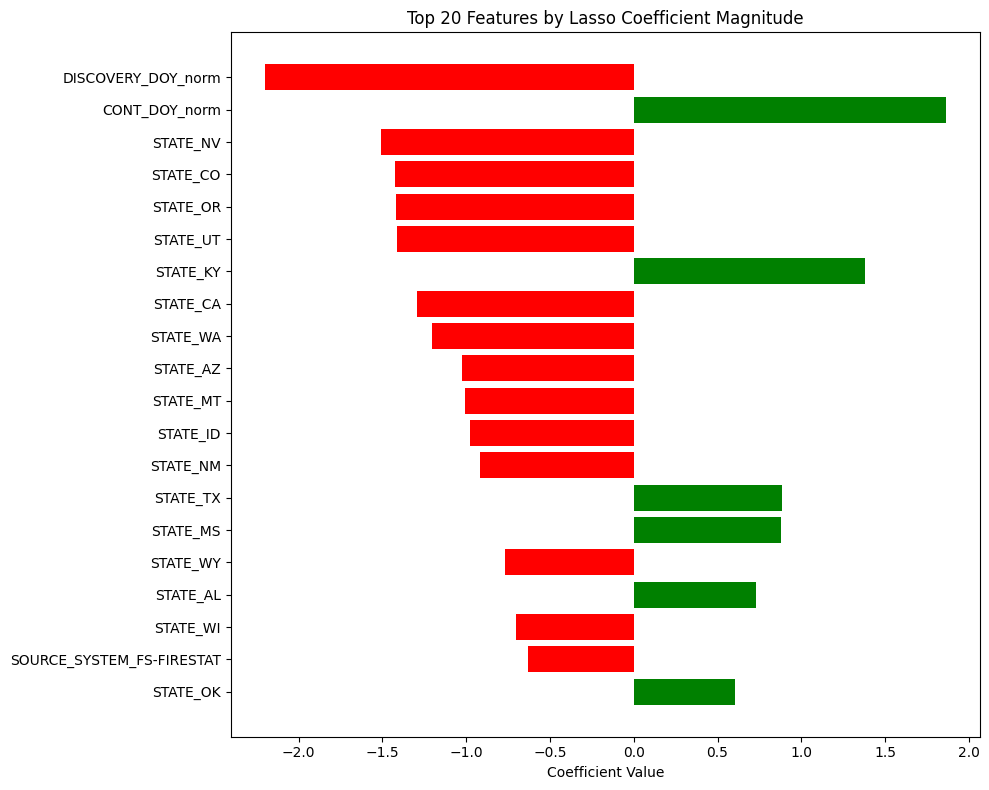

In [51]:
# Feauture importance: TOP 20 coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_cv.coef_
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top 20
top_20 = coef_df.head(20)

plt.figure(figsize=(10, 8))
colors = ['green' if c > 0 else 'red' for c in top_20['Coefficient']]
plt.barh(range(len(top_20)), top_20['Coefficient'], color=colors)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features by Lasso Coefficient Magnitude')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top features are temporal (CONT_DOY_norm, DISCOVERY_DOY_norm) and geographic (STATE). Fires contained later in the year are larger (+), whilst those discovered early are smaller (−). This would require further analysis. Western states (NV, CO, UT) show negative coefficients versus southern/central states (KY, MS, TX) with positive — reflecting regional fire size patterns.

In [52]:
# Evaluate lasso on test set
y_pred_lasso = lasso_cv.predict(X_test)

r2_lasso = r2_score(y_test_log, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test_log, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_log, y_pred_lasso)

print(f"Lasso R² Score: {r2_lasso:.4f}")
print(f"Lasso RMSE: {rmse_lasso:.4f}")
print(f"Lasso MAE: {mae_lasso:.4f}")

print(f"\nComparison with baseline Linear Regression:")
print(f"Linear Regression R²: {r2:.4f} | Lasso R²: {r2_lasso:.4f}")
print(f"Linear Regression RMSE: {rmse:.4f} | Lasso RMSE: {rmse_lasso:.4f}")
print(f"Linear Regression MAE: {mae:.4f} | Lasso MAE: {mae_lasso:.4f}")

Lasso R² Score: 0.2036
Lasso RMSE: 1.1719
Lasso MAE: 0.7788

Comparison with baseline Linear Regression:
Linear Regression R²: 0.2071 | Lasso R²: 0.2036
Linear Regression RMSE: 1.1694 | Lasso RMSE: 1.1719
Linear Regression MAE: 0.7748 | Lasso MAE: 0.7788


Lasso performs nearly identically to baseline (R²: 0.20 vs 0.21). The RMSE-MAE gap persists, confirming outliers aren't a regularisation issue. The problem is missing critical predictors like potentially weather and terrain.

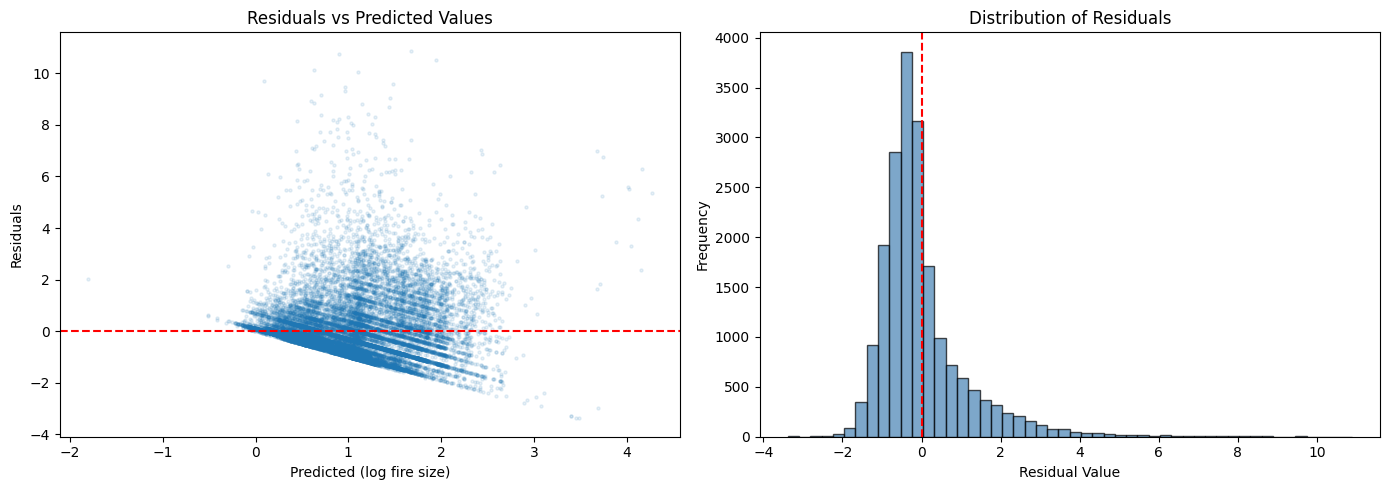

Mean residual: 0.0100
Std residual: 1.1719


In [53]:
# Residual plot
residuals = y_test_log - y_pred_lasso

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred_lasso, residuals, alpha=0.1, s=5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted (log fire size)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Predicted Values')

# Residual distribution
axes[1].hist(residuals, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Residual Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')

plt.tight_layout()
plt.show()

print(f"Mean residual: {residuals.mean():.4f}")
print(f"Std residual: {residuals.std():.4f}")

Fan-shaped scatter shows error variance increases with fire size. Right-skewed distribution with tail to +10 indicates systematic underprediction of extreme fires. Linear models struggle with rare, high-magnitude events.

In [54]:
# Reduced model to non-zero lasso features
selected_features = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
print(f"Selected features: {len(selected_features)} out of {X_train.shape[1]}")

# Retrain linear regression with only selected features
lr_reduced = LinearRegression()
lr_reduced.fit(X_train[selected_features], y_train_log)

y_pred_reduced = lr_reduced.predict(X_test[selected_features])

r2_reduced = r2_score(y_test_log, y_pred_reduced)
rmse_reduced = root_mean_squared_error(y_test_log, y_pred_reduced)
mae_reduced = mean_absolute_error(y_test_log, y_pred_reduced)

print(f"Reduced Linear Regression R²: {r2_reduced:.4f}")
print(f"Reduced Linear Regression RMSE: {rmse_reduced:.4f}")
print(f"Reduced Linear Regression MAE: {mae_reduced:.4f}")

print(f"\nFull comparison:")
print(f"Full LR— R²: {r2:.4f} RMSE: {rmse:.4f} MAE: {mae:.4f}")
print(f"Lasso— R²: {r2_lasso:.4f} RMSE: {rmse_lasso:.4f} MAE: {mae_lasso:.4f}")
print(f"Reduced LR— R²: {r2_reduced:.4f} RMSE: {rmse_reduced:.4f} MAE: {mae_reduced:.4f}")

Selected features: 75 out of 91
Reduced Linear Regression R²: 0.2047
Reduced Linear Regression RMSE: 1.1712
Reduced Linear Regression MAE: 0.7781

Full comparison:
Full LR— R²: 0.2071 RMSE: 1.1694 MAE: 0.7748
Lasso— R²: 0.2036 RMSE: 1.1719 MAE: 0.7788
Reduced LR— R²: 0.2047 RMSE: 1.1712 MAE: 0.7781


Removing 16 features (91→75) barely affects performance (R² drops 0.002). The reduced model is preferable as simpler with negligible performance loss tends to increase performance. The removed features contributed almost nothing.

## Creativity
- Try advanced models (e.g., Ridge, Lasso, Polynomial).
- Create insightful visualizations or optimize hyperparameters.
- Put the nice text justification on your shared colab

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
# Sample 10% of training data for hyperparameter tuning
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train_log[X_train_sample.index]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, None],
    'max_features': ['sqrt', 1.0],
    'min_samples_leaf': [1, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid, cv=5,
    scoring='r2',
    verbose=1, n_jobs=-1
)
grid_search.fit(X_train_sample, y_train_sample)

# Retrain best model on full training data
best_params = grid_search.best_params_
print(f"Best parameters (from sample): {best_params}")
print(f"Best CV R² score (from sample): {grid_search.best_score_:.4f}")

best_rf = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train_log)

y_pred_rf = best_rf.predict(X_test)

r2_rf = r2_score(y_test_log, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test_log, y_pred_rf)
mae_rf = mean_absolute_error(y_test_log, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest MAE: {mae_rf:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters (from sample): {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 4, 'n_estimators': 200}
Best CV R² score (from sample): 0.3057
Random Forest R²: 0.4366
Random Forest RMSE: 0.9857
Random Forest MAE: 0.6278


GridSearchCV tuned Random Forest on 10% of training data (for speed) with 5-fold cross-validation.

Parameter grid:

- n_estimators=[100, 200]: 100 is default; testing 200 to see if a larger ensemble improves stability.
- max_depth=[20, None]: Testing constrained depth (20) versus unlimited growth (default) to balance complexity and overfitting risk.
- max_features=['sqrt', 1.0]: Testing subset of features (sqrt equivalent ≈33%) for decorrelation versus all features for maximum information.
- min_samples_leaf=[1, 4]: Testing default (1) versus slightly higher (4) to reduce overfitting on noisy data.

Best parameters: n_estimators=200, max_depth=None, max_features=1.0, min_samples_leaf=4.

Random Forest achieved R²=0.44, RMSE=0.99, MAE=0.63 — doubling linear models' performance (R²: 0.21→0.44). The jump confirms strong non-linear relationships in the data.

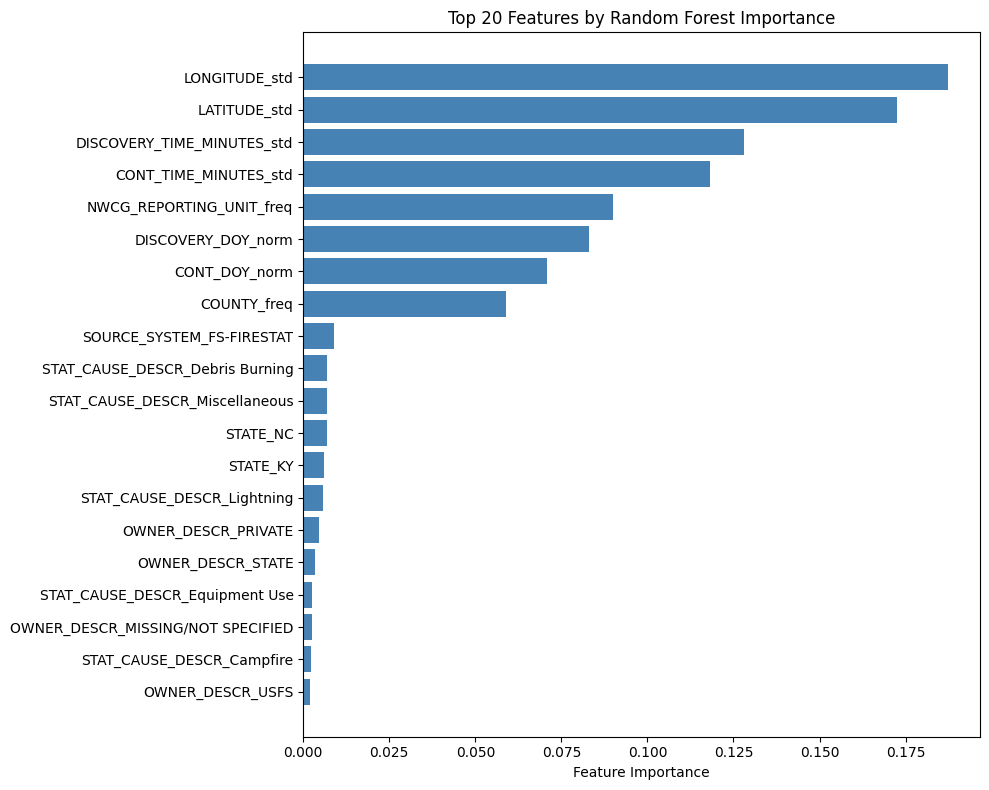

In [57]:
# Random Forest feature importance (top 20)
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

top_20_rf = rf_importance.head(20)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_20_rf)), top_20_rf['Importance'], color='steelblue')
plt.yticks(range(len(top_20_rf)), top_20_rf['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features by Random Forest Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Random Forest prioritises LONGITUDE and LATITUDE, whilst Lasso prioritised temporal features (CONT_DOY_norm, DISCOVERY_DOY_norm) and state dummies. This reflects their different mechanisms: Lasso uses state categories to capture geography linearly, whilst Random Forest learns non-linear spatial patterns directly from coordinates. Both agree geography and timing drive fire size, but through different representations.

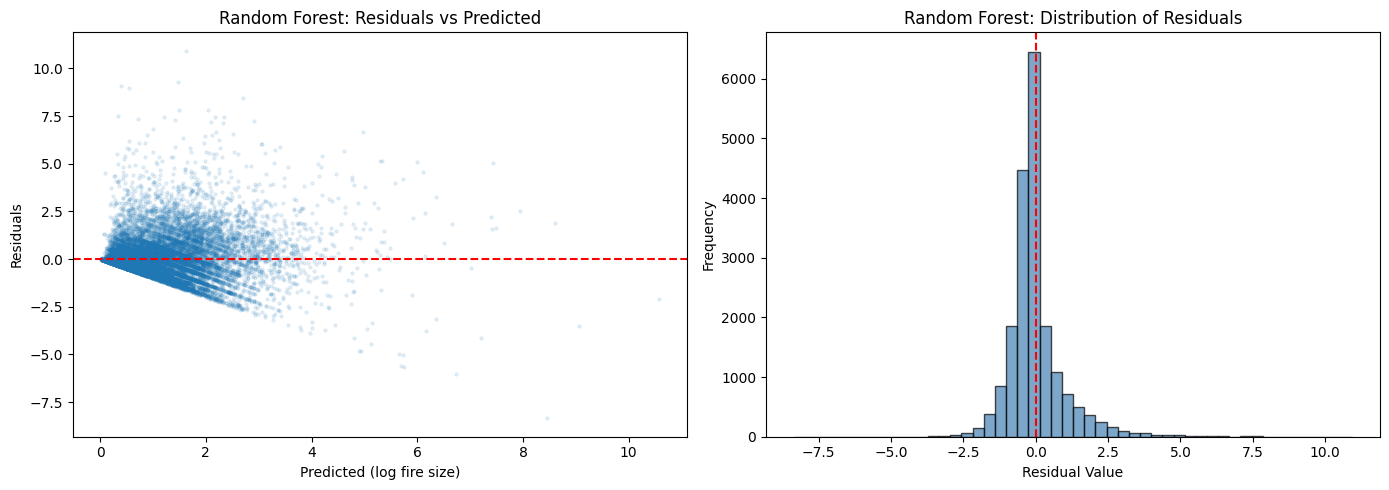

Mean residual: -0.0085
Std residual: 0.9857


In [58]:
# Random Forest residual plot
residuals_rf = y_test_log - y_pred_rf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_pred_rf, residuals_rf, alpha=0.1, s=5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted (log fire size)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Random Forest: Residuals vs Predicted')

axes[1].hist(residuals_rf, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Residual Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Random Forest: Distribution of Residuals')

plt.tight_layout()
plt.show()

print(f"Mean residual: {residuals_rf.mean():.4f}")
print(f"Std residual: {residuals_rf.std():.4f}")

Residuals are tighter around zero (std: 0.99 vs 1.17 for linear models), with distribution more sharply peaked. The RMSE-MAE gap narrows (0.99 vs 0.63, compared to 1.17 vs 0.77 for linear models), showing Random Forest handles outliers better. The fan shape persists — heteroscedasticity remains for large fires. Right tail shows continued underprediction of extreme events.

               Model        R²      RMSE       MAE  Features
0  Linear Regression  0.207116  1.169374  0.774770        91
1              Lasso  0.203649  1.171928  0.778762        91
2         Reduced LR  0.204684  1.171167  0.778143        75
3      Random Forest  0.436599  0.985729  0.627830        91


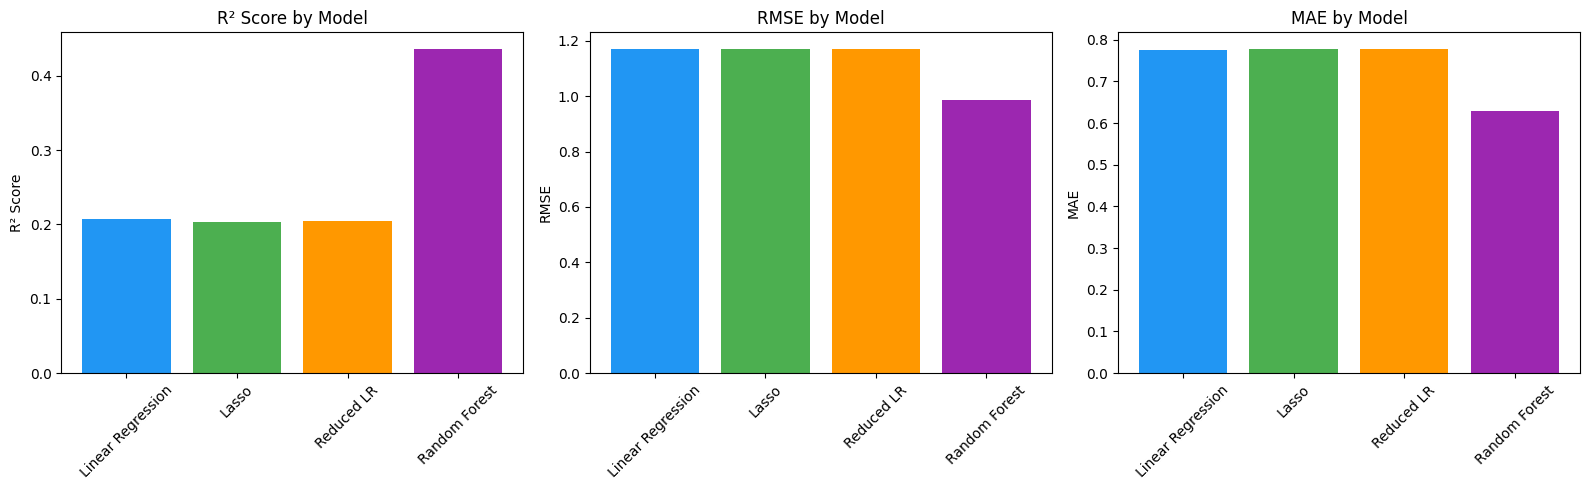

In [59]:
# Final Model Comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Reduced LR', 'Random Forest'],
    'R²': [r2, r2_lasso, r2_reduced, r2_rf],
    'RMSE': [rmse, rmse_lasso, rmse_reduced, rmse_rf],
    'MAE': [mae, mae_lasso, mae_reduced, mae_rf],
    'Features': [91, 91, len(selected_features), 91]
})

print(results.to_string())

# Visualise comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

colors = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336']

axes[0].bar(results['Model'], results['R²'], color=colors)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score by Model')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(results['Model'], results['RMSE'], color=colors)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE by Model')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(results['Model'], results['MAE'], color=colors)
axes[2].set_ylabel('MAE')
axes[2].set_title('MAE by Model')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

All linear models (R²≈0.21) performed identically regardless of regularisation, confirming the relationship is fundamentally non-linear. Random Forest doubled performance (R²=0.44) but still leaves 56% of variance unexplained.
The core issue is missing critical predictors: weather (wind, temperature, humidity), fuel moisture, terrain slope, vegetation type and response time could be potential predictors. The persistent heteroscedasticity across all models confirms extreme fires require different data, not just better algorithms.
Future work could test gradient boosting models (XGBoost, LightGBM) for potential further gains, though the real improvement would probably come from incorporating weather and terrain data. Neural networks might capture complex interactions but would likely overfit given the limited feature set.